In [1]:

import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

total_weight_gram =1.323+0.774

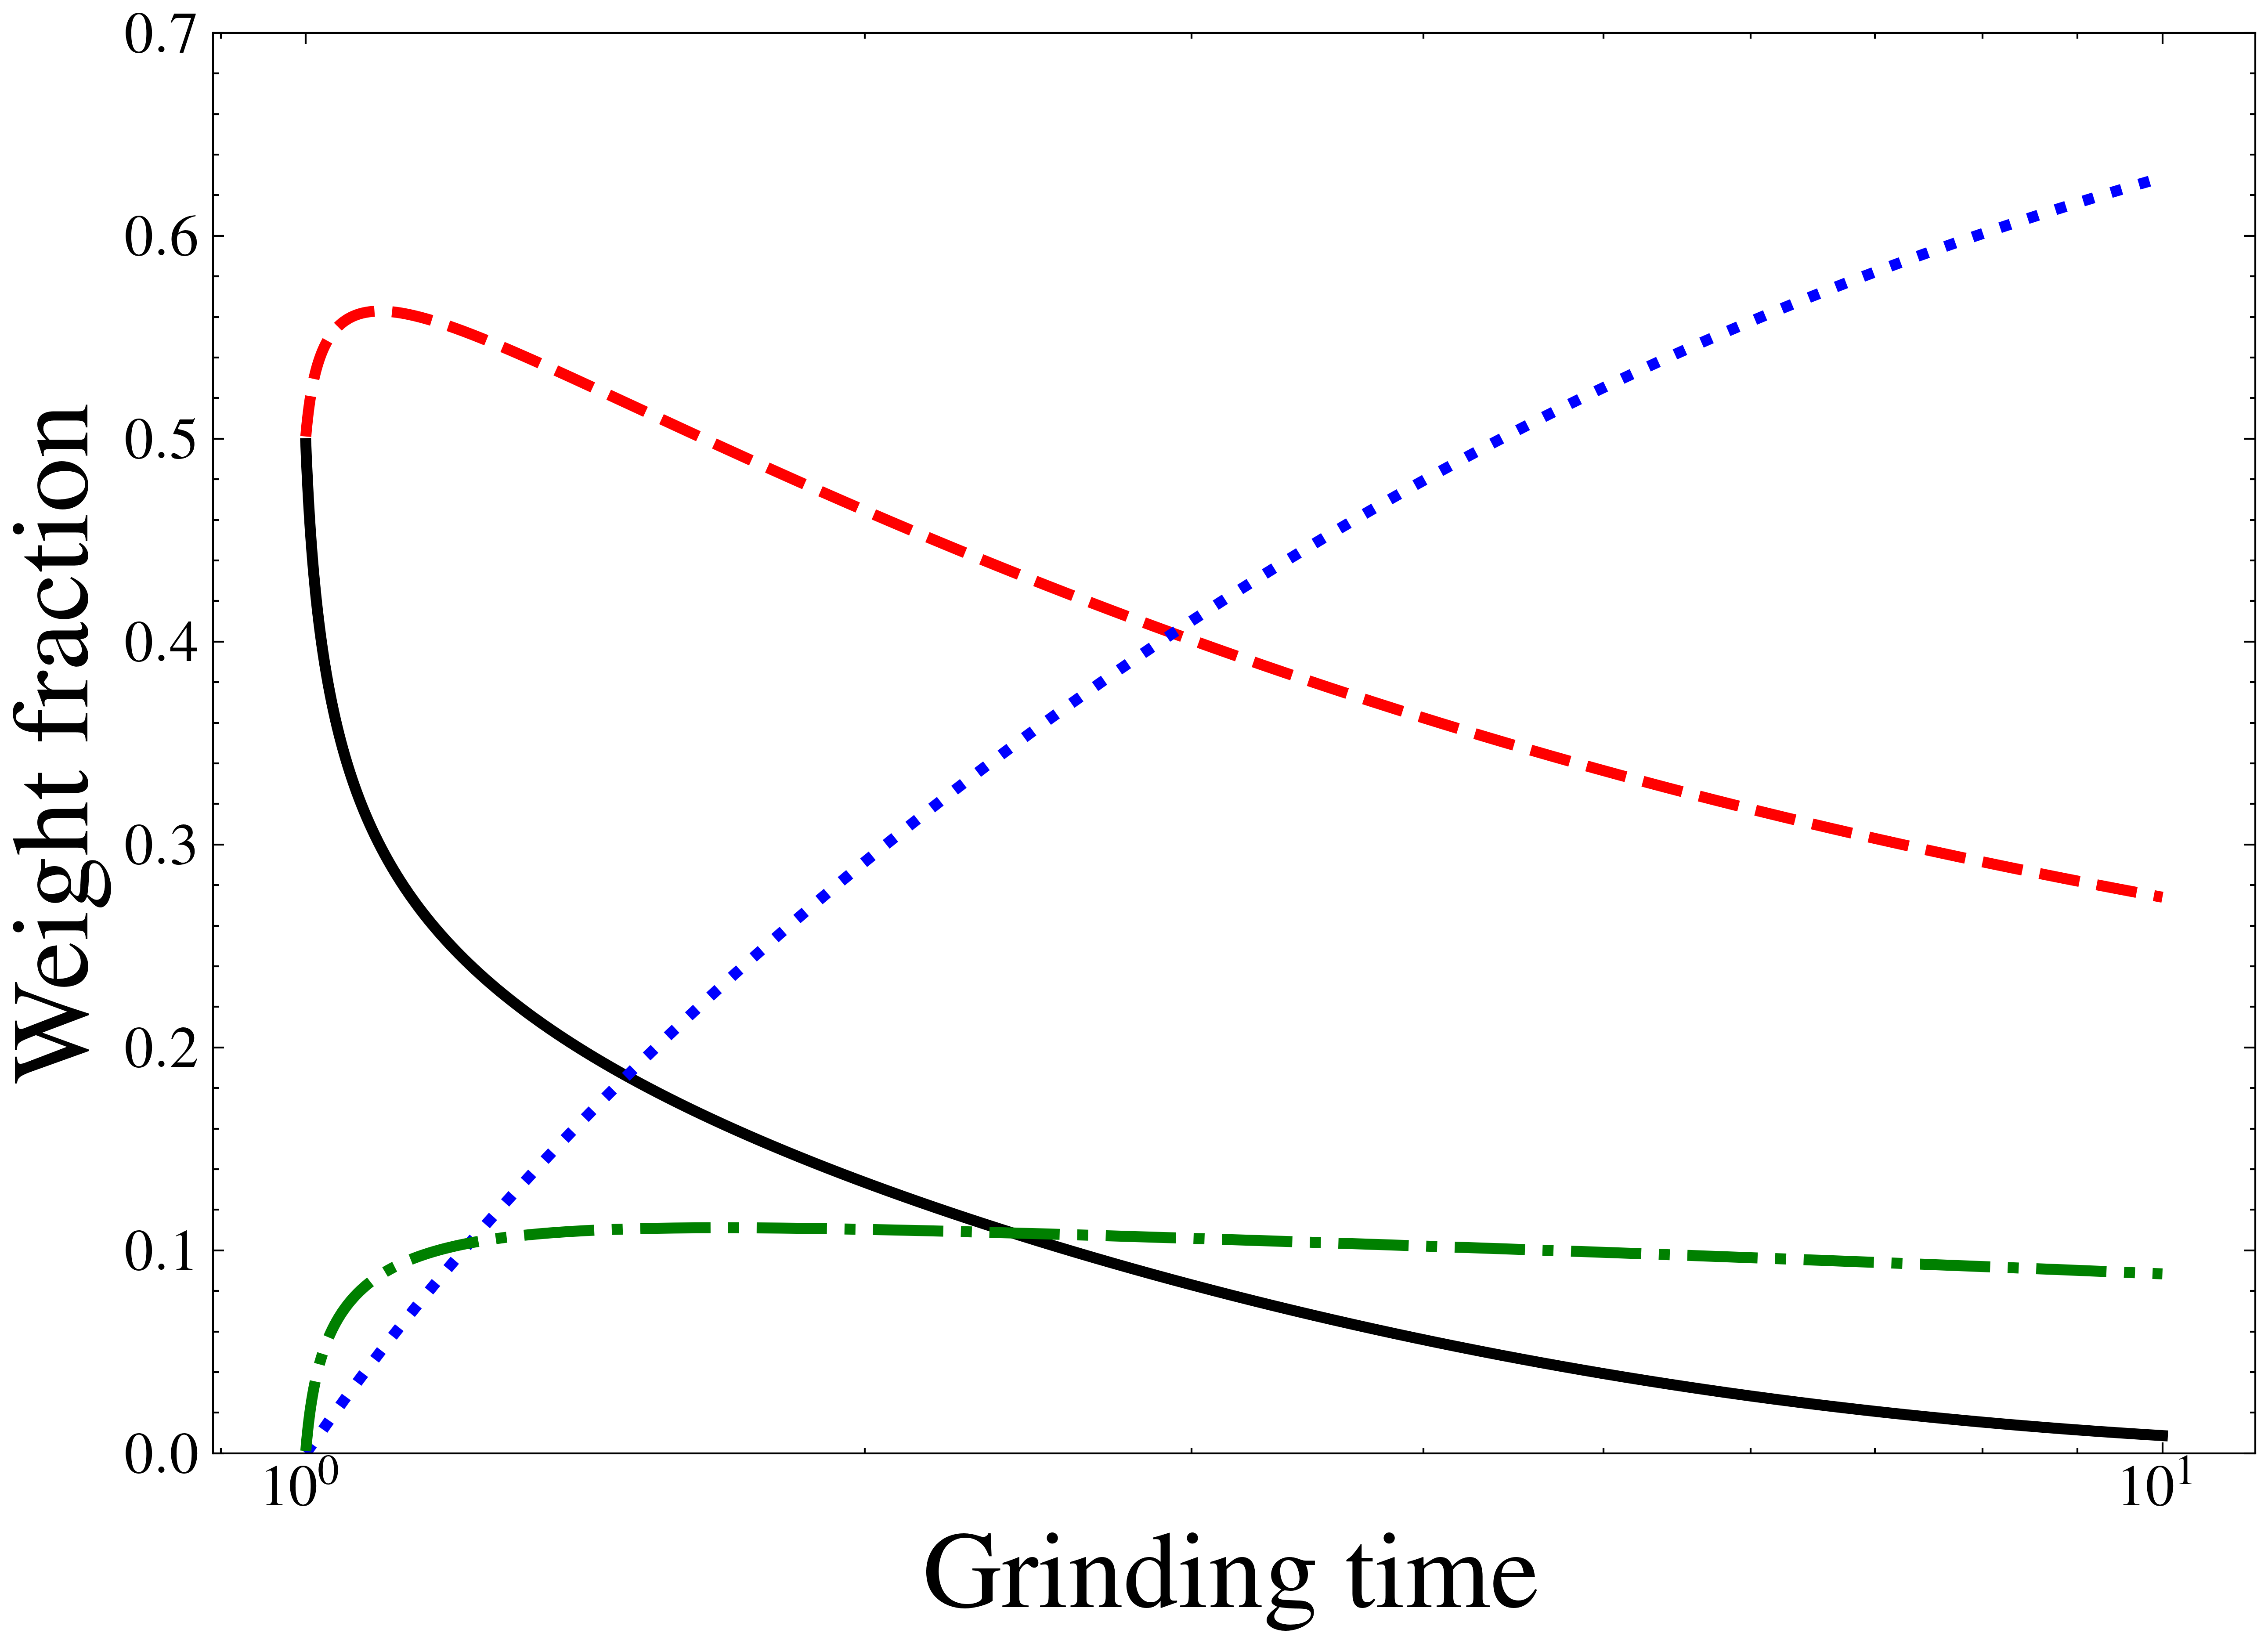

In [10]:
#  微分方程式のシミュレーション
import scienceplots
plt.style.use(['science','ieee'])
def plot_simulate_reaction(
    k,
    t,
    initial_amounts,
    plot_title="",
    y_axis="molar frac",
    overlapping_plot=False,
    save_fig=False,
    log_time_scale=False,
):
    """
    微分方程式のシミュレーション

    reaction 1: CsBr + PbBr2 → CsPbBr3
    reaction 2: 4CsBr + PbBr2 → Cs4PbBr6
    reaction 3: CsPbBr3 + 3CsBr → Cs4PbBr6
    reaction 4: Cs4PbBr6 + 3PbBr2 → 4CsPbBr3

    rate 1: k1 * [CsBr] * [PbBr2]
    rate 2: k2 * [CsBr]^4 * [PbBr2]
    rate 3: k3 * [CsPbBr3] * [CsBr]^3
    rate 4: k4 * [Cs4PbBr6] * [PbBr2]^3

    d[PbBr2]/dt    = -r1     -r2     0*r3    -3*r4
    d[CsBr]/dt     = -r1     -4*r2   -3*r3   0*r4
    d[CsPbBr3]/dt  = r1       0*r2    -r3     4*r4
    d[Cs4PbBr6]/dt = 0*r1     r2      r3      -r4
    """
    k1, k2, k3, k4 = k
    PbBr2, CsBr, CsPbBr3, Cs4PbBr6 = initial_amounts
    total_amount = sum(initial_amounts)

    # Set initial conditions
    dt = t[1] - t[0]  # time step

    CsBr_list, PbBr2_list, CsPbBr3_list, Cs4PbBr6_list = [], [], [], []

    if not any(item in y_axis for item in ["weight frac","mol frac", "mol conc"]):
        print('y_axis must be either "mol frac" or "mol conc"')
        return False

    for i in range(len(t)):
        # Calculate rates
        rate1 = k1 * CsBr * PbBr2
        rate2 = k2 * CsBr**4 * PbBr2
        rate3 = k3 * CsPbBr3 * CsBr**3
        rate4 = k4 * Cs4PbBr6 * PbBr2**3

        # Update amounts
        PbBr2 -= (dt * (rate1 + rate2 + 3 * rate4))
        CsBr -= (dt * (rate1 + 4 * rate2 + 3 * rate3))
        CsPbBr3 += (dt * (rate1 - rate3 + 4 * rate4))
        Cs4PbBr6 += (dt * (rate2 + rate3 - rate4))

        total_amount = CsBr + PbBr2 + CsPbBr3 + Cs4PbBr6
        if y_axis == "weight frac":
            # save molar fraction
            CsBr_list.append(CsBr / total_amount)
            PbBr2_list.append(PbBr2 / total_amount)
            CsPbBr3_list.append(CsPbBr3 / total_amount)
            Cs4PbBr6_list.append(Cs4PbBr6 / total_amount)
        elif y_axis == "mol frac":
            # save molar fraction
            CsBr_list.append(CsBr / total_amount)
            PbBr2_list.append(PbBr2 / total_amount)
            CsPbBr3_list.append(CsPbBr3 / total_amount)
            Cs4PbBr6_list.append(Cs4PbBr6 / total_amount)
        elif y_axis == "mol conc":
            # Save mole
            CsBr_list.append(CsBr)
            PbBr2_list.append(PbBr2)
            CsPbBr3_list.append(CsPbBr3)
            Cs4PbBr6_list.append(Cs4PbBr6)

        if i < len(t) - 1:
            dt = t[i + 1] - t[i]  # update time step

    if overlapping_plot == False:
        plt.figure(figsize=(10, 7))
    plt.plot(t, CsBr_list, label="CsBr (simulated)",linewidth=3)
    plt.plot(t, PbBr2_list, label="PbBr2 (simulated)",linewidth=3)
    plt.plot(t, CsPbBr3_list, label="CsPbBr3 (simulated)",linewidth=3)
    plt.plot(t, Cs4PbBr6_list, label="Cs4PbBr6 (simulated)",linewidth=3)
    # plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=14)

    # plt.xlabel('time [sec]',fontsize=14)
    plt.xlabel("Grinding time", fontsize=30)

    if y_axis == "weight frac":
        plt.ylabel("Weight fraction", fontsize=30)
    if y_axis == "mol frac":
        plt.ylabel("Molar fraction", fontsize=20)
    elif y_axis == "mol conc":
        plt.ylabel(r"Molar concentration [$mol/cm^3$]", fontsize=20)
    if log_time_scale == True:
        plt.xscale("log")
    plt.title(plot_title)
    plt.tick_params(axis="both", which="both", direction="in")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(0,0.7)
    if save_fig != False:
        plt.savefig(save_fig + "_reaction_rate.png", bbox_inches="tight", dpi=300)

    return CsBr_list, PbBr2_list, CsPbBr3_list, Cs4PbBr6_list


# Example usage:
k_exp1 = [0.1, 1, 1, 0.1]
k_exp2 = [1, 10, 1, 1]
k_exp3 = [0, 1, 0, 1]
t = np.logspace(0, 1, 10000)
initial_amounts = [1, 1, 0, 0]
# _,_,_,_=plot_simulate_reaction(k_exp1, copy.copy(t), copy.copy(initial_amounts), y_axis="weight frac",save_fig="fig1_exp1",log_time_scale=True)
_,_,_,_=plot_simulate_reaction(k_exp2, copy.copy(t), copy.copy(initial_amounts), y_axis="weight frac",save_fig="fig1_exp2",log_time_scale=True)
# _,_,_,_=plot_simulate_reaction(k_exp3, copy.copy(t), copy.copy(initial_amounts), y_axis="weight frac",save_fig="fig1_exp3",log_time_scale=True)


In [80]:
# weight fraction to molar fraction

# Define molar masses
molar_masses = {
    "CsBr": 212.814,
    "PbBr2": 364.4,
    "CsPbBr3": 579.722,
    "Cs4PbBr6": 1218.24,
}


def convert_weight_to_molar_and_molar_fractions(weight_fractions):
    # Convert weight fractions to molar fractions
    moles = {}
    molar_fractions = {}
    total_moles = 0

    for compound, weight_fraction in weight_fractions.items():
        mole = (weight_fraction * total_weight_gram) / molar_masses[compound]
        moles[compound] = mole
        molar_fractions[compound] = mole
        total_moles += mole

    # Normalize molar fractions to sum up to 1
    for compound, molar_fraction in molar_fractions.items():
        molar_fractions[compound] = molar_fraction / total_moles

    return moles, molar_fractions

# Example usage:
test_weight_frac = {  
    "CsBr": 0.3,
    "PbBr2": 0.7,
    "CsPbBr3": 0,
    "Cs4PbBr6": 0,
}
moles, molar_frac =convert_weight_to_molar_and_molar_fractions(test_weight_frac)
print("test weight frac",test_weight_frac)
print("moles",moles)
print("molar_frac",molar_frac)

test weight frac {'CsBr': 0.3, 'PbBr2': 0.7, 'CsPbBr3': 0, 'Cs4PbBr6': 0}
moles {'CsBr': 0.0029561025120527786, 'PbBr2': 0.004028265642151482, 'CsPbBr3': 0.0, 'Cs4PbBr6': 0.0}
molar_frac {'CsBr': 0.4232455172445834, 'PbBr2': 0.5767544827554166, 'CsPbBr3': 0.0, 'Cs4PbBr6': 0.0}


In [81]:
# mole to molar concentration
# Define Density
density = {
    "CsBr": 4.44,
    "PbBr2": 6.66,
    "CsPbBr3": 4.8402,  # by Cif file
    "Cs4PbBr6": 4.3057,  # by Cif file
}
# density = {
#     "CsBr": 212.814/78.8,
#     "PbBr2": 364.4/364.4,
#     "CsPbBr3": 579.722/795.68,
#     "Cs4PbBr6": 1218.24/2819,
# }



def convert_mole_to_molar_concentration(moles):
    molar_concentrations = {}
    for compound, mole in moles.items():
        molar_concentrations[compound] = mole * (density[compound] / total_weight_gram)
    return molar_concentrations



# Example usage:
test_weight_frac = {  
    "CsBr": 0.3,
    "PbBr2": 0.7,
    "CsPbBr3": 0,
    "Cs4PbBr6": 0,
}
moles, molar_frac =convert_weight_to_molar_and_molar_fractions(test_weight_frac)
molar_conc = convert_mole_to_molar_concentration(moles)
print("test weight frac",test_weight_frac)
print("moles",moles)
print("molar_frac",molar_frac)
print("molar_conc",molar_conc)


test weight frac {'CsBr': 0.3, 'PbBr2': 0.7, 'CsPbBr3': 0, 'Cs4PbBr6': 0}
moles {'CsBr': 0.0029561025120527786, 'PbBr2': 0.004028265642151482, 'CsPbBr3': 0.0, 'Cs4PbBr6': 0.0}
molar_frac {'CsBr': 0.4232455172445834, 'PbBr2': 0.5767544827554166, 'CsPbBr3': 0.0, 'Cs4PbBr6': 0.0}
molar_conc {'CsBr': 0.006258986720798445, 'PbBr2': 0.012793633369923162, 'CsPbBr3': 0.0, 'Cs4PbBr6': 0.0}


In [82]:
# Data preprocess

from scipy.interpolate import interp1d
def plot_exp(
    df_experiments,
    df_interpolated,
    study_name="",
    overlapping_plot=False,
    plot_line=True,
    x_axis="time [min]",
    y_axis="mol frac",
    plot_title="",
    plot_legend=True,
    save_fig=False,
):
    """
    y_axis: "weight frac","mol frac","mol conc"
    """
    df_exp = df_experiments.copy()
    df_interp = df_interpolated.copy()
    
    # Plot the original and interpolated data on log scale
    if overlapping_plot == False:
        plt.figure(figsize=(10, 6))
    for col in ["CsPbBr3", "Cs4PbBr6", "PbBr2", "CsBr"]:
        plt.plot(
            df_exp["time"], df_exp[col], marker="o", linestyle="", label=f"{col}"
        )
        if plot_line:
            plt.plot(df_interp["time"], df_interp[col], label=f"{col} (interpolated)")

    if plot_legend:
        plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=14)
    plt.title(plot_title)
    plt.tick_params(axis="both", which="both", direction="in")
    # plt.xscale("log")
    plt.rcParams["xtick.labelsize"] = (
        15  # plt.xticks(fontsize=15) can not reflect to the plot
    )
    plt.yticks(fontsize=15)

    plt.xlabel("Grinding time [min]", fontsize=20)
    
    if y_axis == "mol frac":
        plt.ylabel("Molar fraction", fontsize=20)
        # plt.ylim(0,0.6)
        if save_fig:
            plt.savefig(study_name + "_mol_frac.png", bbox_inches="tight", dpi=300)
    elif y_axis == "mol conc":
        plt.ylabel(r"Molar concentration [$mol/cm^3$]", fontsize=20)
    elif y_axis == "weight frac":
        plt.ylabel("Weight fraction", fontsize=20)


def exp_data_preprocess(study_name,file_path, save_fig=False):
    
    df_weight_frac = pd.read_csv(file_path)
    df_weight_frac = df_weight_frac.fillna(0)
    df_weight_frac = df_weight_frac.sort_values(by="time")
    df_weight_frac = df_weight_frac.reset_index(drop=True)

    # Convert the weight fractions to molar fractions
    df_moles, df_molar_frac,df_molar_conc = df_weight_frac.copy(), df_weight_frac.copy(), df_weight_frac.copy()
    for i, row in df_weight_frac.iterrows():
        weight_frac = row[["CsPbBr3", "Cs4PbBr6", "PbBr2", "CsBr"]].to_dict()

        moles, molar_frac = convert_weight_to_molar_and_molar_fractions(
            weight_frac
        )
        molar_conc = convert_mole_to_molar_concentration(moles)
        for compound, value in moles.items():
            df_moles.at[i, compound] = value
        for compound, value in molar_frac.items():
            df_molar_frac.at[i, compound] = value
        for compound, value in molar_conc.items():
            df_molar_conc.at[i, compound] = value

    # Extract the 'min' column for the x values (time)
    exp_time = df_molar_conc["time"].values
    interp_time = np.linspace(exp_time.min(), exp_time.max(), 1000)
    interp_time_log = np.logspace(
        np.log(exp_time.min()), np.log(exp_time.max()), 1000, base=np.exp(1)
    )
    # Acoid unexpected value without ionterporate range from rounding error
    interp_time[0] = exp_time[0]
    interp_time[-1] = exp_time[-1]
    interp_time_log[0] = exp_time[0]
    interp_time_log[-1] = exp_time[-1]
    
    # Define a dictionary to store the interpolated data for cubic interpolation on log time
    interp_molar_frac, interp_molar_frac_log = pd.DataFrame(), pd.DataFrame()
    interp_molar_conc, interp_molar_conc_log = pd.DataFrame(), pd.DataFrame()
    for col in ["CsPbBr3", "Cs4PbBr6", "PbBr2", "CsBr"]:
        # molar fraction
        interp_func = interp1d(
            exp_time, df_molar_frac[col].values, kind="linear"
        )
        interp_molar_frac[col] = interp_func(interp_time)
        interp_molar_frac_log[col] = interp_func(interp_time_log)
        # molar concentration
        interp_func = interp1d(
            exp_time, df_molar_conc[col].values, kind="linear"
        ) 
        interp_molar_conc[col] = interp_func(interp_time)
        interp_molar_conc_log[col] = interp_func(interp_time_log)
   

    # Add time
    interp_molar_conc["time"] = interp_time
    interp_molar_conc_log["time"] = interp_time_log
    interp_molar_frac["time"] = interp_time
    interp_molar_frac_log["time"] = interp_time_log

    # convert dataframe
    interp_molar_conc = pd.DataFrame(interp_molar_conc)
    interp_molar_conc_log = pd.DataFrame(interp_molar_conc_log)
    interp_molar_frac = pd.DataFrame(interp_molar_frac)
    interp_molar_frac_log = pd.DataFrame(interp_molar_frac_log)

    # plot
    plot_exp(
        df_weight_frac,
        interp_molar_conc,
        y_axis="weight frac",
    )
    plot_exp(
        df_molar_frac,
        interp_molar_frac,
        y_axis="mol frac",
        save_fig=save_fig,
        study_name=study_name,
    )
    plot_exp(
        df_molar_conc,
        interp_molar_conc,
        y_axis="mol conc",
    )

    return interp_molar_conc,df_molar_conc

In [100]:
# 最小二乗を使った反応速度定数の推定

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from scipy.optimize import nnls


def Calc_DifferentialEq(x_init, k_1, k_2, step=1000, dt=0.001, show=False):
    x_list = []
    t_list = []
    t_list.append(0)
    x_list.append(x_init)
    for i in range(step):
        x_list.append(x_list[i] + (k_1 * x_list[i] + k_2 * x_list[i] * x_list[i]) * dt)
        t_list.append(t_list[i] + dt)

    if show:
        plt.figure()
        plt.plot(np.array(t_list), np.array(x_list))

    return np.array(t_list), np.array(x_list)

def CalcNNLS(Standard, value):
    coef, norm = nnls(Standard, value)
    return coef


def CalcLinearRegression(Standard, value):
    linear = LinearRegression()
    linear.fit(Standard, value)
    return linear.coef_


def CalcLassoRegression(Standard, value, alpha=1.0):
    lasso = Lasso(alpha=alpha)
    lasso.fit(Standard, value)
    return lasso.coef_


def CalcRidgeRegression(Standard, value, alpha=1.0):
    ridge = Ridge(alpha=alpha)
    ridge.fit(Standard, value)
    return ridge.coef_


def Calc_verocity(t_list, x_list):
    verocity_list = []
    for i in range(t_list.shape[0] - 1):
        verocity_list.append((x_list[i + 1] - x_list[i]) / (t_list[i + 1] - t_list[i]))

    return np.array(verocity_list)


def Estimate_Constant(
    df_concentrations,
    df_exp,
    method="nnls",
    alpha=1.0,
    show=False,
    k4_zero=False,
    save_fig=False,
):
    """
    微分方程式の係数推定
    v1~v4それぞれのk1~k4を推定する

    reaction 1: CsBr + PbBr2 → CsPbBr3
    reaction 2: 4CsBr + PbBr2 → Cs4PbBr6
    reaction 3: CsPbBr3 + 3CsBr → Cs4PbBr6
    reaction 4: Cs4PbBr6 + 3PbBr2 → 4CsPbBr3

    rate 1: k1 * [CsBr] * [PbBr2]
    rate 2: k2 * [CsBr]^4 * [PbBr2]
    rate 3: k3 * [CsPbBr3] * [CsBr]^3
    rate 4: k4 * [Cs4PbBr6] * [PbBr2]^3

    d[PbBr2]/dt    = -r1     -r2     0*r3    -3*r4
    d[CsBr]/dt     = -r1     -4*r2   -3*r3   0*r4
    d[CsPbBr3]/dt  = r1       0*r2    -r3     4*r4
    d[Cs4PbBr6]/dt = 0*r1     r2      r3      -r4
    """

    
    # calc verocity
    t_list= df_concentrations["time"].values
    v1 = Calc_verocity(t_list, df_concentrations["PbBr2"].values)
    v2 = Calc_verocity(t_list, df_concentrations["CsBr"].values)
    v3 = Calc_verocity(t_list, df_concentrations["CsPbBr3"].values)
    v4 = Calc_verocity(t_list, df_concentrations["Cs4PbBr6"].values)

    verocity = np.concatenate([v1, v2, v3, v4])

    # calc standard
    PbBr2 = df_concentrations["PbBr2"].values[1:]
    CsBr = df_concentrations["CsBr"].values[1:]
    CsPbBr3 = df_concentrations["CsPbBr3"].values[1:]
    Cs4PbBr6 = df_concentrations["Cs4PbBr6"].values[1:]

    r1 = CsBr * PbBr2
    r2 = CsBr**4 * PbBr2
    r3 = CsPbBr3 * CsBr**3
    r4 = Cs4PbBr6 * PbBr2**3
    zero_vec = np.zeros(r1.shape)
    if k4_zero:
        r4 = zero_vec  # inhibit r4 because of inverse reaction

    standard1 = np.stack([-r1, -r2, zero_vec, -3 * r4]).T
    standard2 = np.stack([-r1, -4 * r2, -3 * r3, zero_vec]).T
    standard3 = np.stack([r1, zero_vec, -r3, 4 * r4]).T
    standard4 = np.stack([zero_vec, r2, r3, -r4]).T
    standard = np.concatenate([standard1, standard2, standard3, standard4])

    # estimate k
    # print(verocity.shape,standard.shape)
    if method == "linear":
        estimate_result = CalcLinearRegression(standard, verocity)
    elif method == "nnls":
        estimate_result = CalcNNLS(standard, verocity)
    elif method == "lasso":
        estimate_result = CalcLassoRegression(standard, verocity, alpha=alpha)
    elif method == "ridge":
        estimate_result = CalcRidgeRegression(standard, verocity, alpha=alpha)
    print(method, estimate_result)

    # plot
    initial_concentrations = df_exp.loc[
        0, ["PbBr2", "CsBr", "CsPbBr3", "Cs4PbBr6"]
    ].values
    if show:
        plot_exp(
            df_exp,
            df_concentrations,
            plot_title="",
            plot_line=False,
            y_axis="mol conc",
            plot_legend=False,
        )
        PbBr2, CsBr, CsPbBr3, Cs4PbBr6 = plot_simulate_reaction(
            estimate_result,
            t_list,
            initial_concentrations,
            overlapping_plot=True,
            plot_title="",
            y_axis="mol conc",
            save_fig=save_fig,
        )
    else:
        PbBr2, CsBr, CsPbBr3, Cs4PbBr6 = plot_simulate_reaction(
            estimate_result,
            t_list,
            initial_concentrations,
            overlapping_plot=True,
            plot_title="",
            y_axis="mol conc",
            save_fig=save_fig,
        )

    # calc MSE

    PbBr2_exp = df_concentrations["PbBr2"].values
    CsBr_exp = df_concentrations["CsBr"].values
    CsPbBr3_exp = df_concentrations["CsPbBr3"].values
    Cs4PbBr6_exp = df_concentrations["Cs4PbBr6"].values
    distance = np.sqrt(
        np.sum(
            (CsBr - CsBr_exp) ** 2
            + (PbBr2 - PbBr2_exp) ** 2
            + (CsPbBr3 - CsPbBr3_exp) ** 2
            + (Cs4PbBr6 - Cs4PbBr6_exp) ** 2
        )
    )
    print(method, "MSE:", distance)

    return estimate_result




linear [ 7.39989422e-01 -1.23933206e+06  1.84386799e+05 -5.30167014e+03]
linear MSE: 0.15229545714103054
linear [ 1.68420237e+00 -5.59924370e+06  2.79724883e+05 -1.99887247e+04]
linear MSE: 0.14360914889236975
linear [ 4.29037551e-01 -8.80074826e+03 -1.10145855e+04 -2.80929706e+04]
linear MSE: 0.12246652639332584
linear [-4.47763515e+00 -1.24283726e+06  2.62819679e+05  4.18543654e+05]
linear MSE: 0.0720320492544416
linear [ 1.55013779e+00 -2.81788081e+06  6.09895183e+05 -6.45720312e+03]
linear MSE: 0.2282973921769935
linear [-4.14867997e+00 -3.32944012e+10  1.64997390e+08  2.27904176e+04]


C:\Users\yusak\AppData\Local\Temp\ipykernel_408\3482866949.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))
C:\Users\yusak\AppData\Local\Temp\ipykernel_408\3066677984.py:46: RuntimeWarning: overflow encountered in scalar power
  rate2 = k2 * CsBr**4 * PbBr2
C:\Users\yusak\AppData\Local\Temp\ipykernel_408\3066677984.py:47: RuntimeWarning: overflow encountered in scalar multiply
  rate3 = k3 * CsPbBr3 * CsBr**3
C:\Users\yusak\AppData\Local\Temp\ipykernel_408\3066677984.py:48: RuntimeWarning: overflow encountered in scalar multiply
  rate4 = k4 * Cs4PbBr6 * PbBr2**3
C:\Users\yusak\AppData\Local\Temp\ipykernel_408\3066677984.py:53: RuntimeWarning: invalid value encountered in scalar add
  CsPbB

linear MSE: nan


,k1,k2,k3,k4
YN30_10N_speed1_weight_fraction_1,0.739989,-1.239332e+06,1.843868e+05,-5301.670139
YN30_10N_speed1_weight_fraction_2,1.684202,-5.599244e+06,2.797249e+05,-19988.724673
YN31_10N_speed05_weight_fraction_1,0.429038,-8.800748e+03,-1.101459e+04,-28092.970642
YN31_10N_speed05_weight_fraction_2,-4.477635,-1.242837e+06,2.628197e+05,418543.653852
YN33_20N_speed05_weight_fraction_1,1.550138,-2.817881e+06,6.098952e+05,-6457.203125
YN33_20N_speed05_weight_fraction_2,-4.148680,-3.329440e+10,1.649974e+08,22790.417578


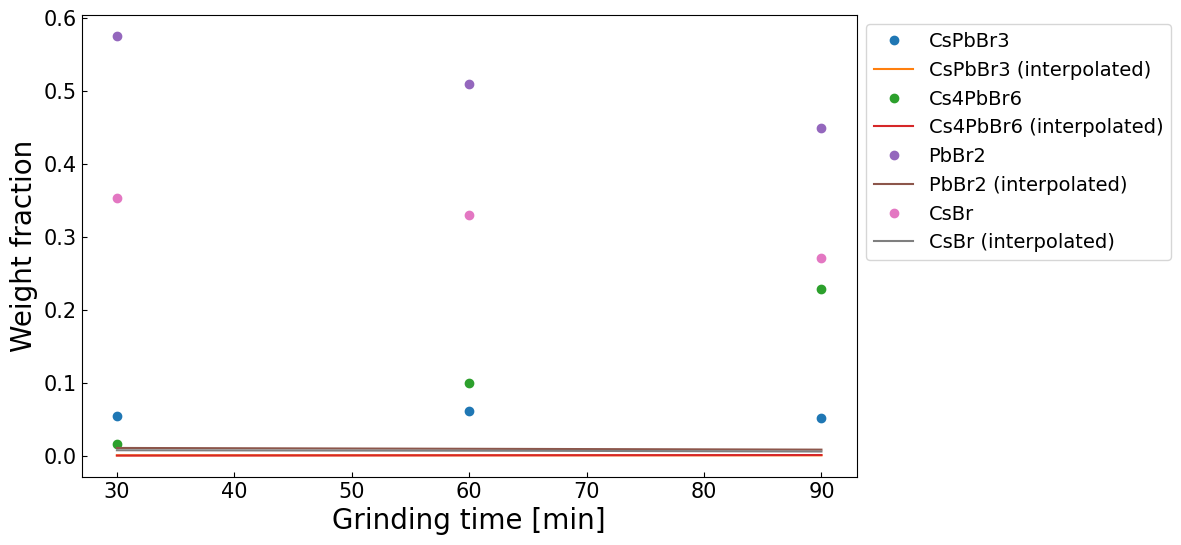

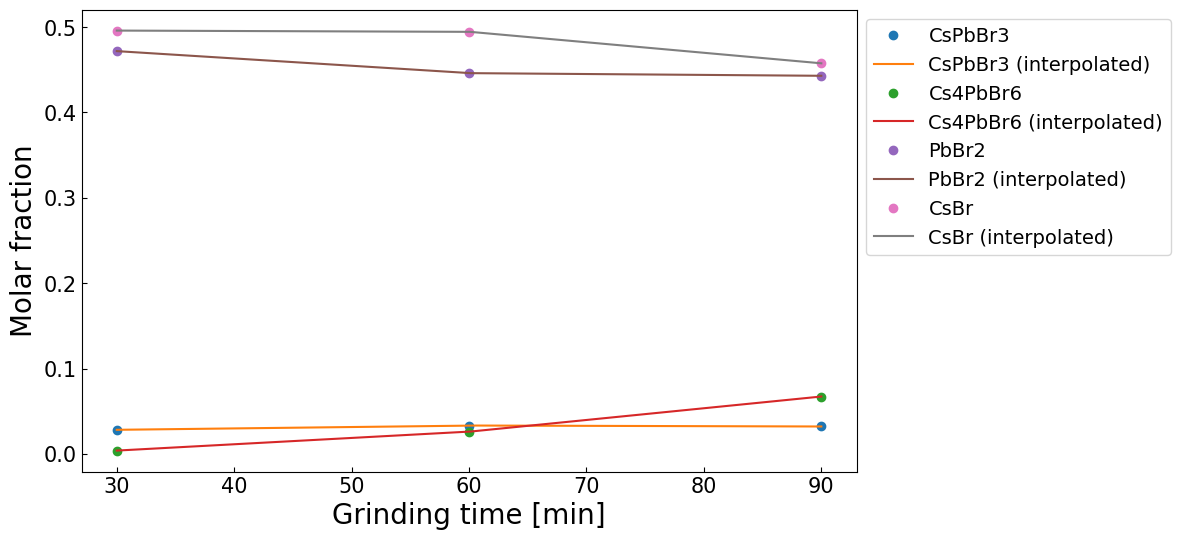

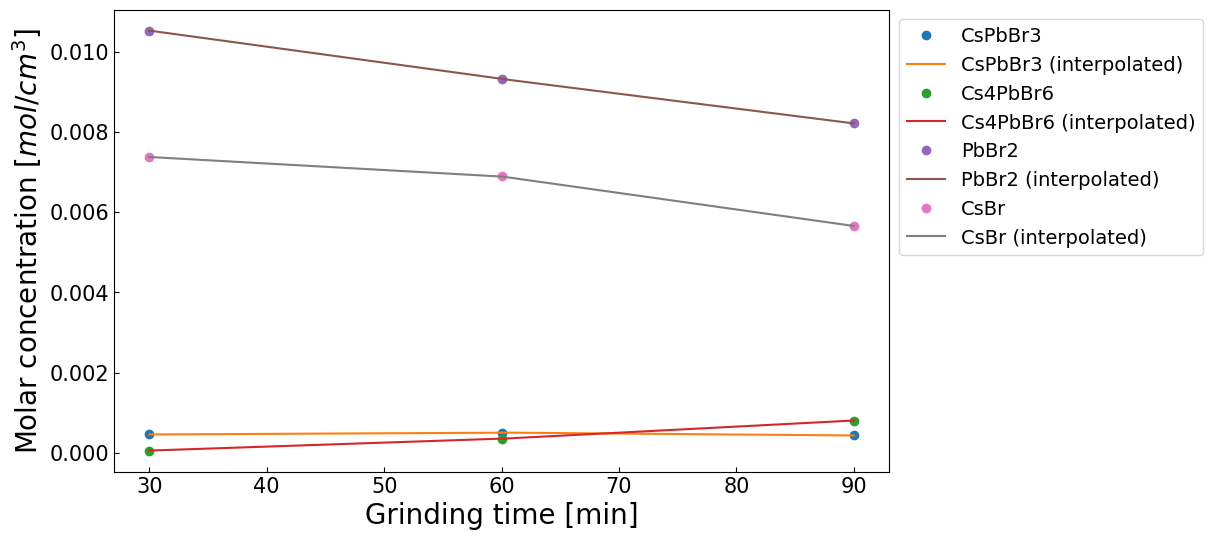

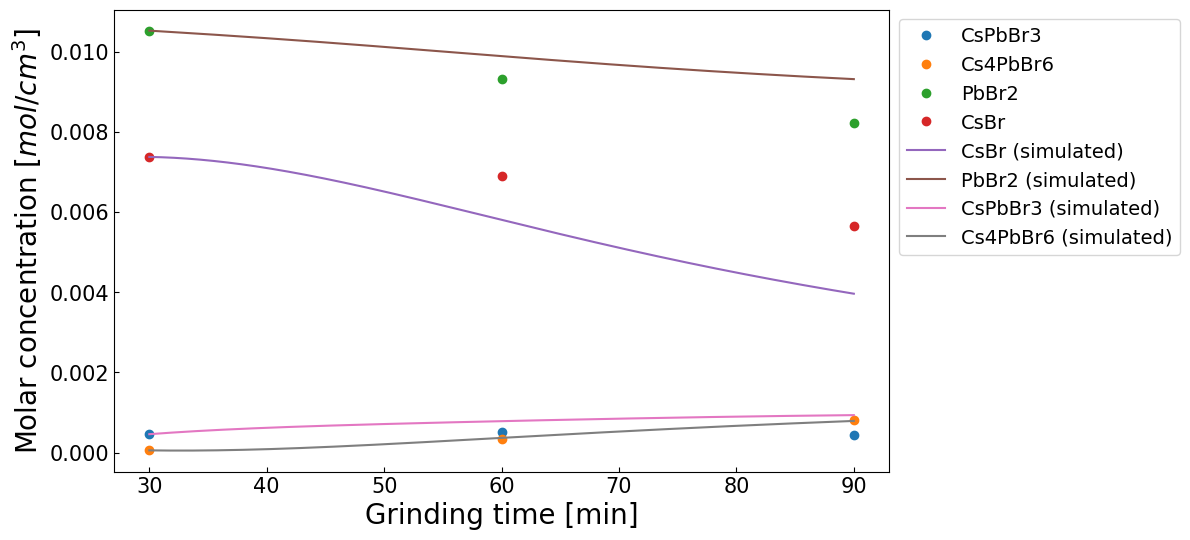

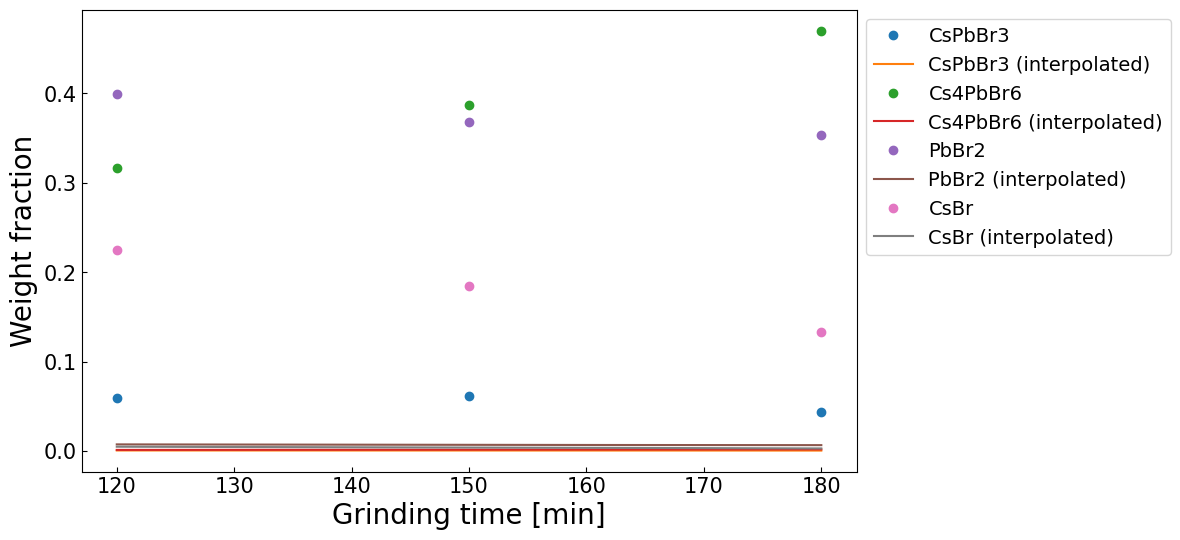

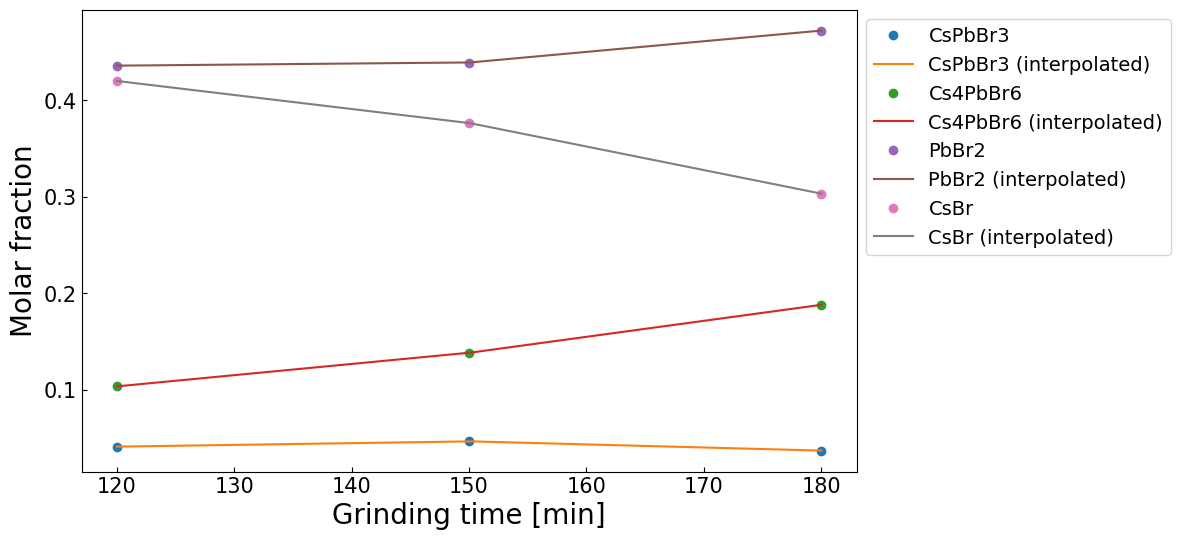

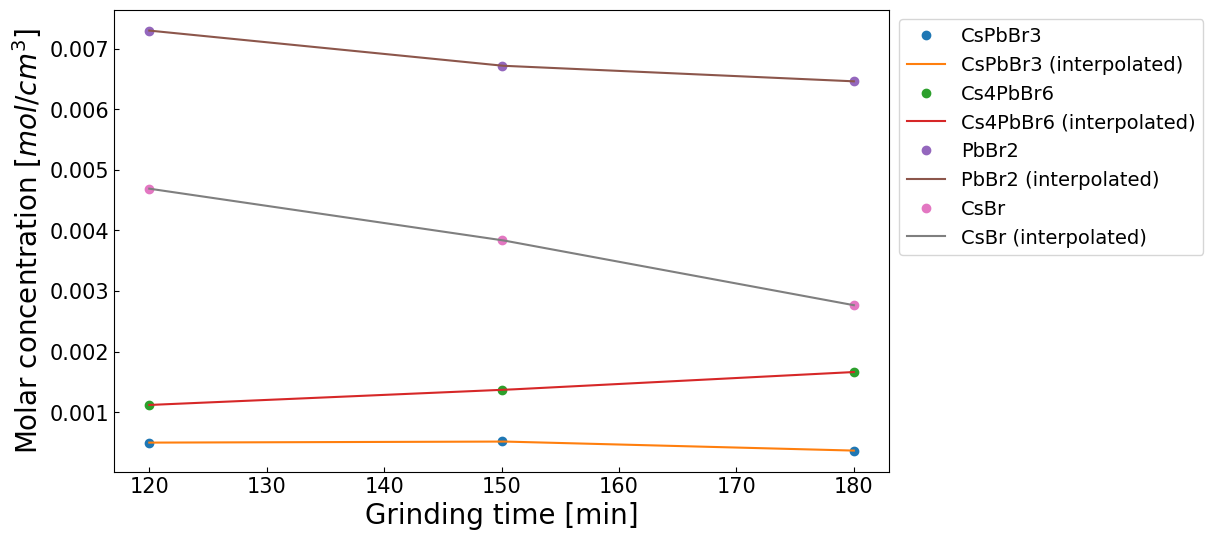

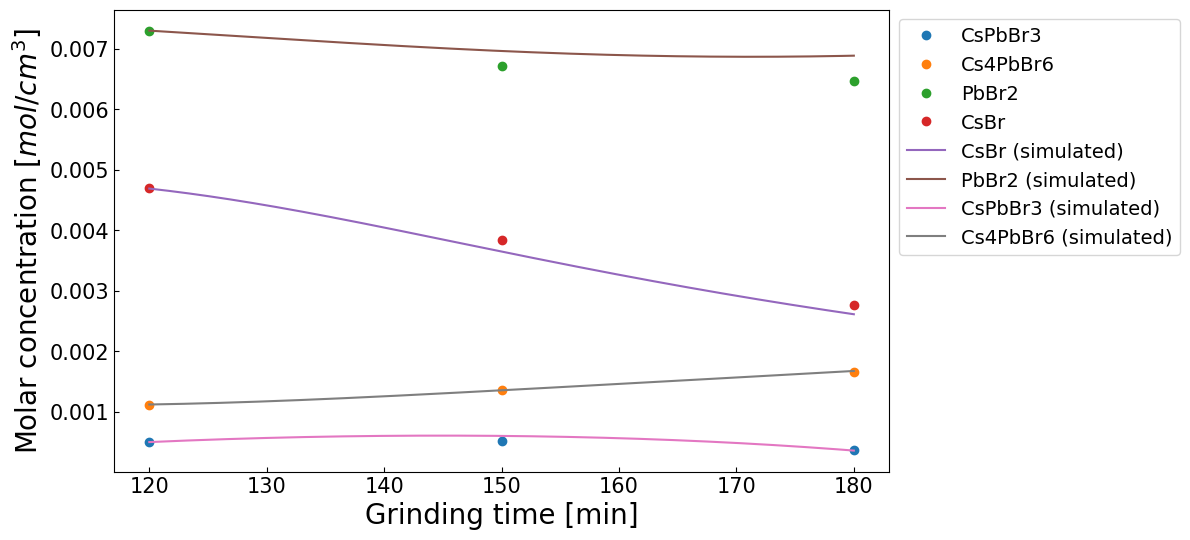

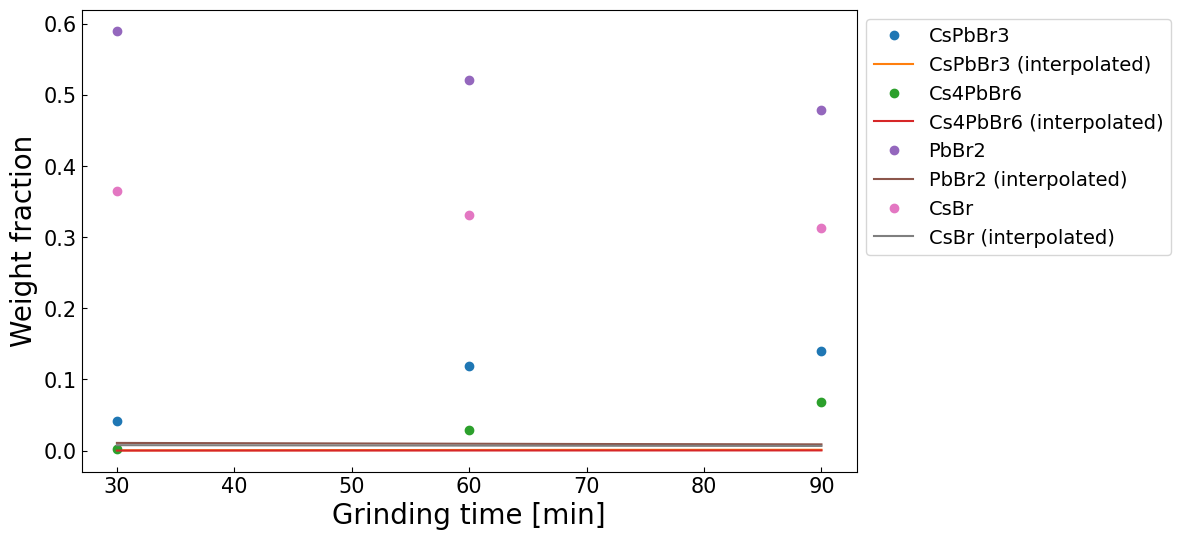

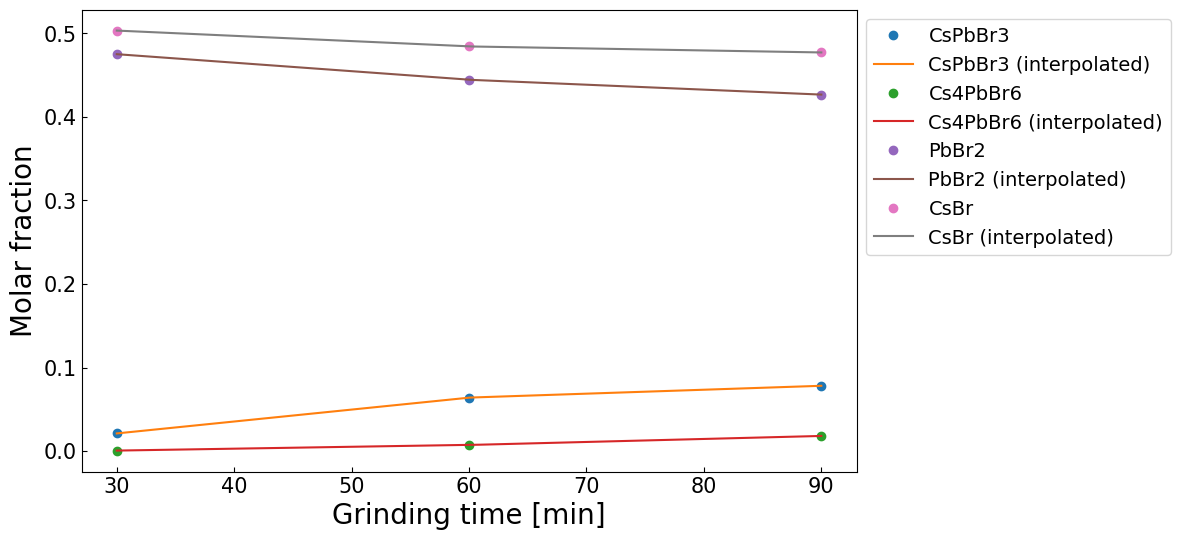

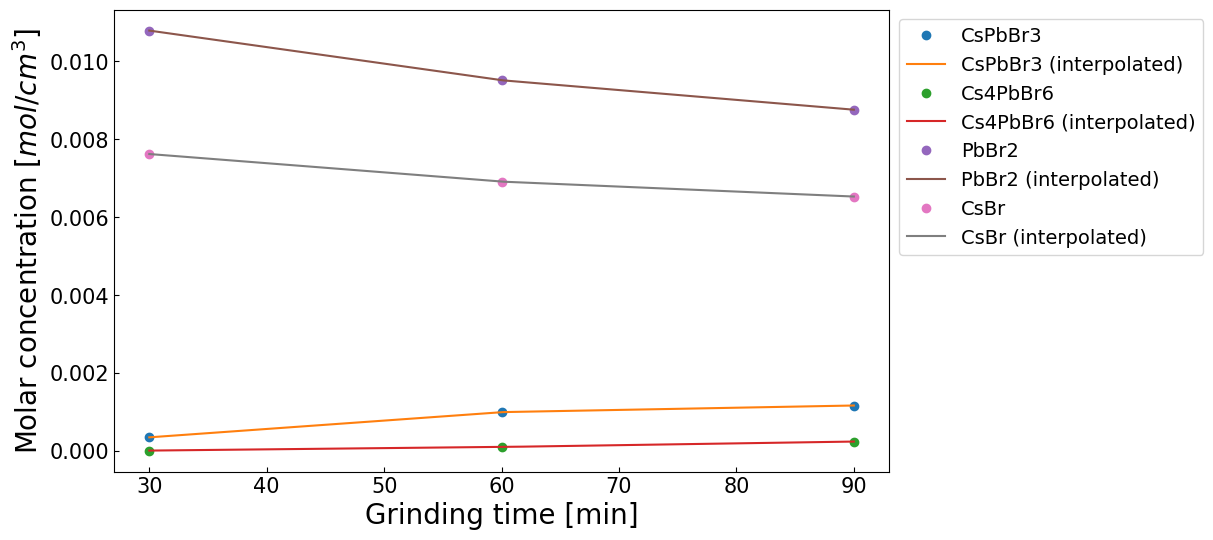

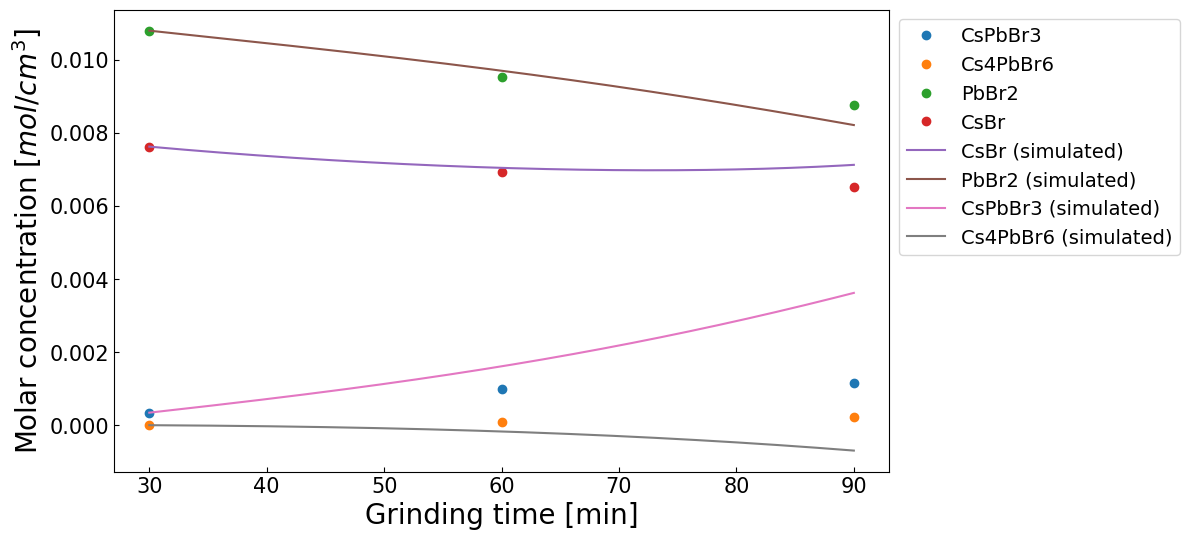

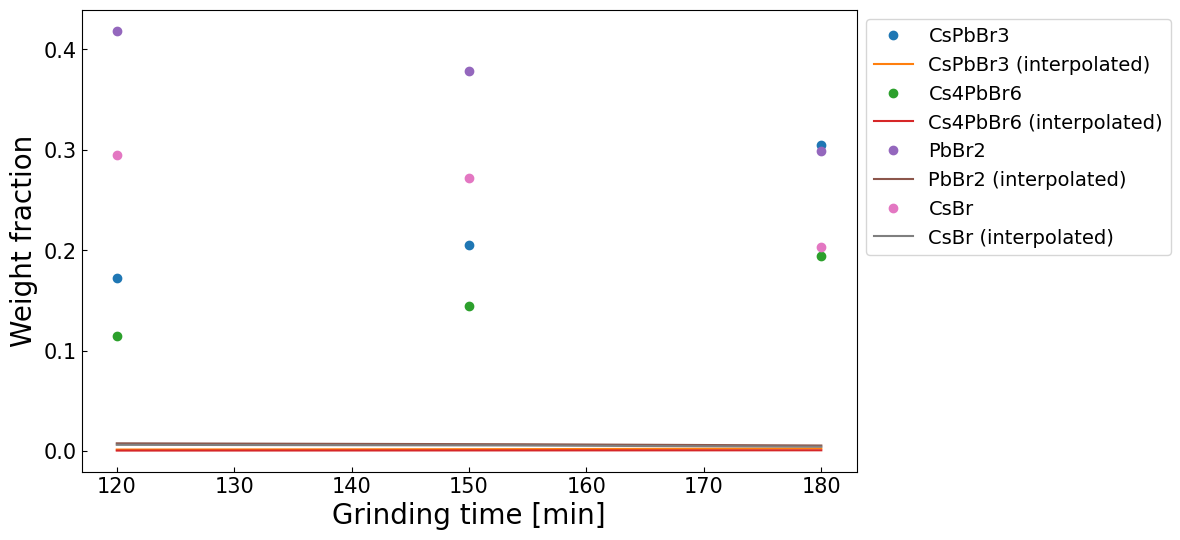

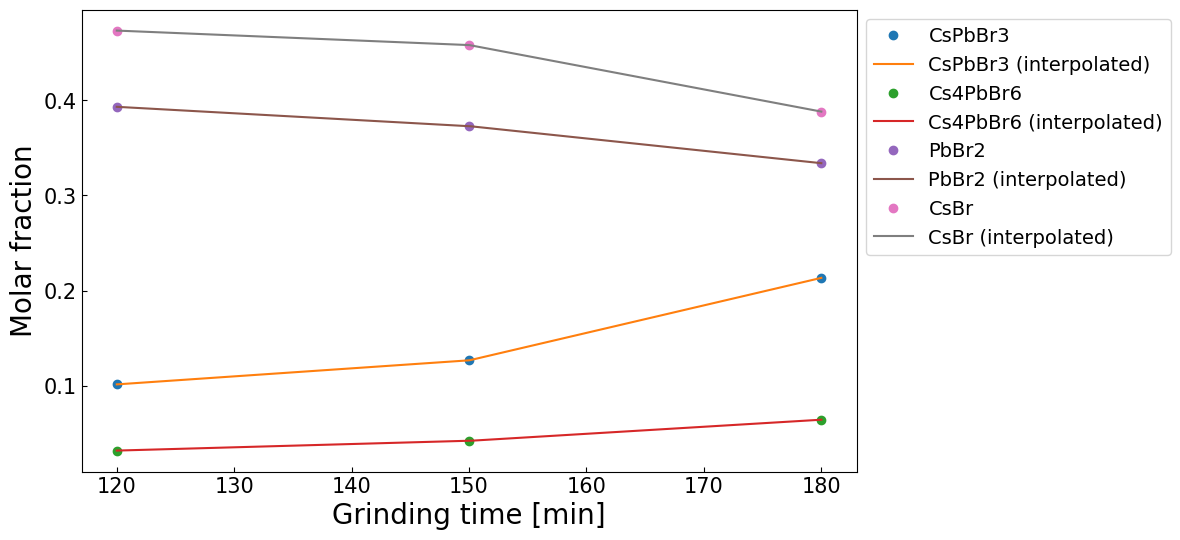

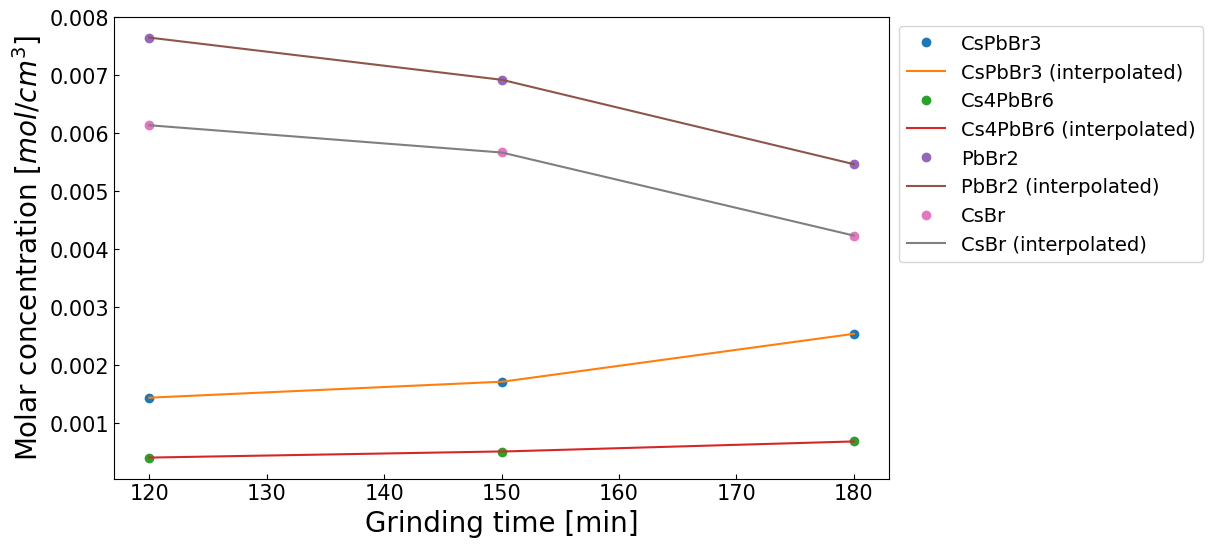

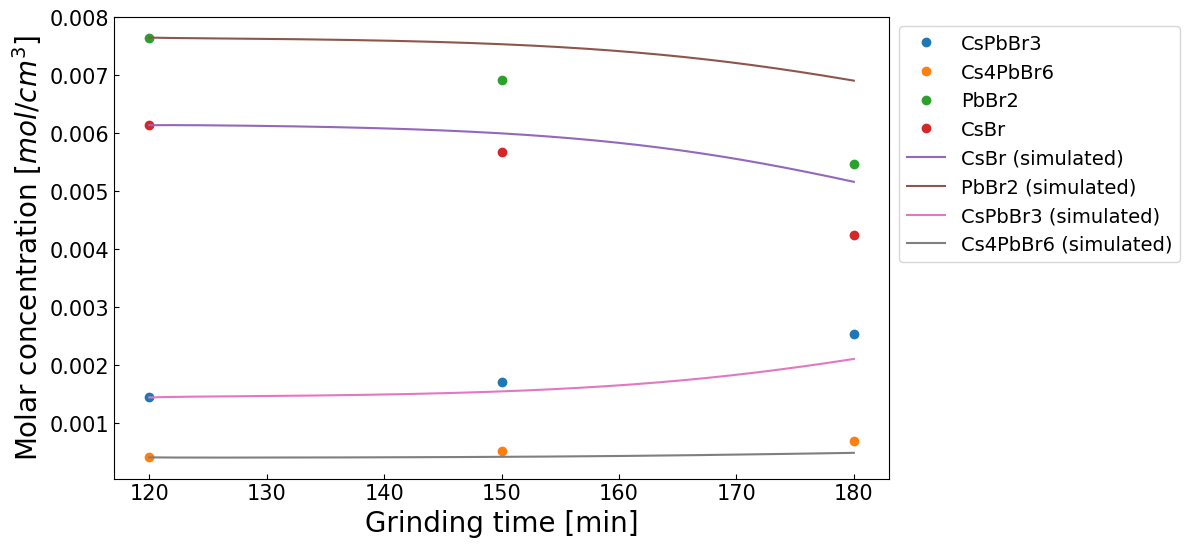

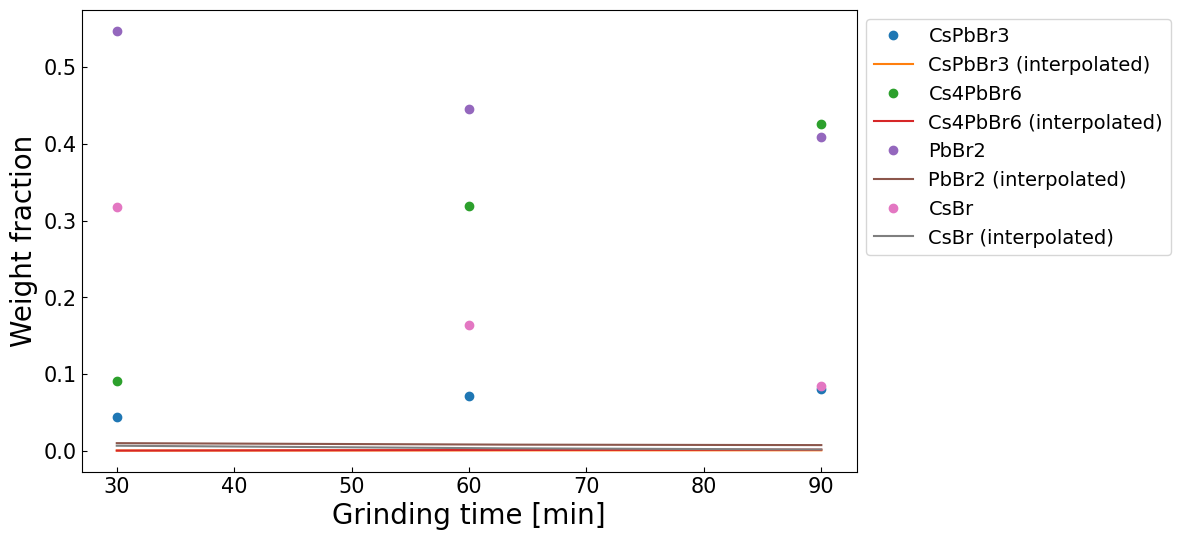

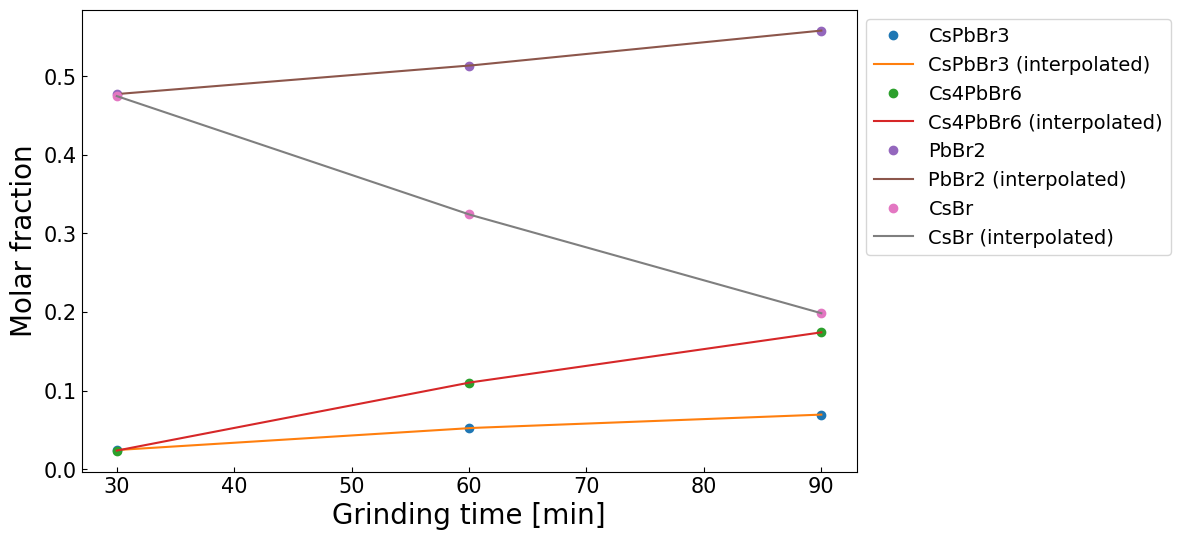

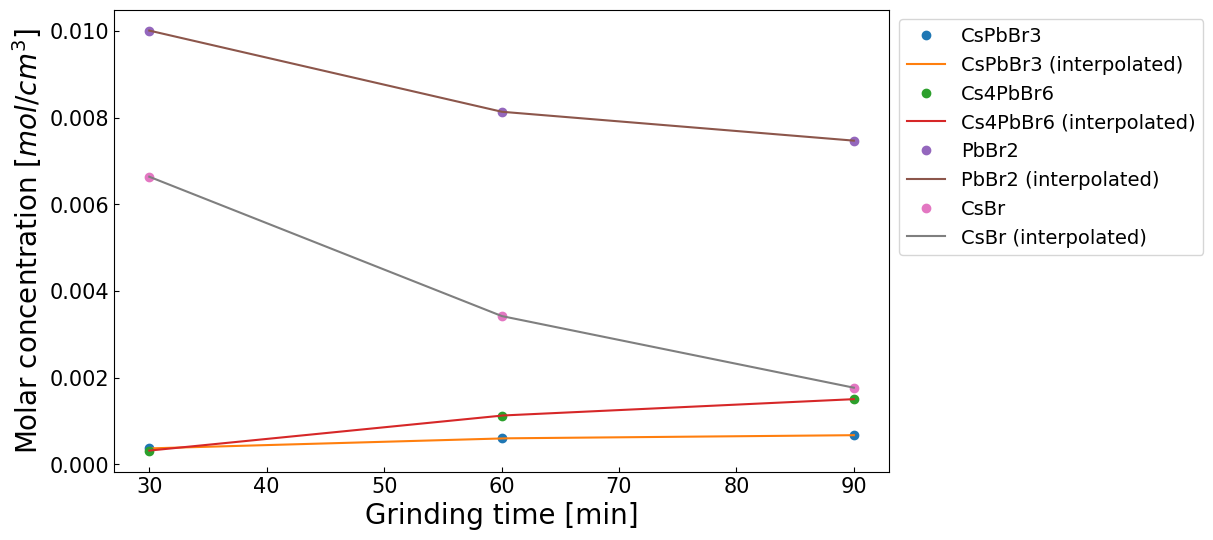

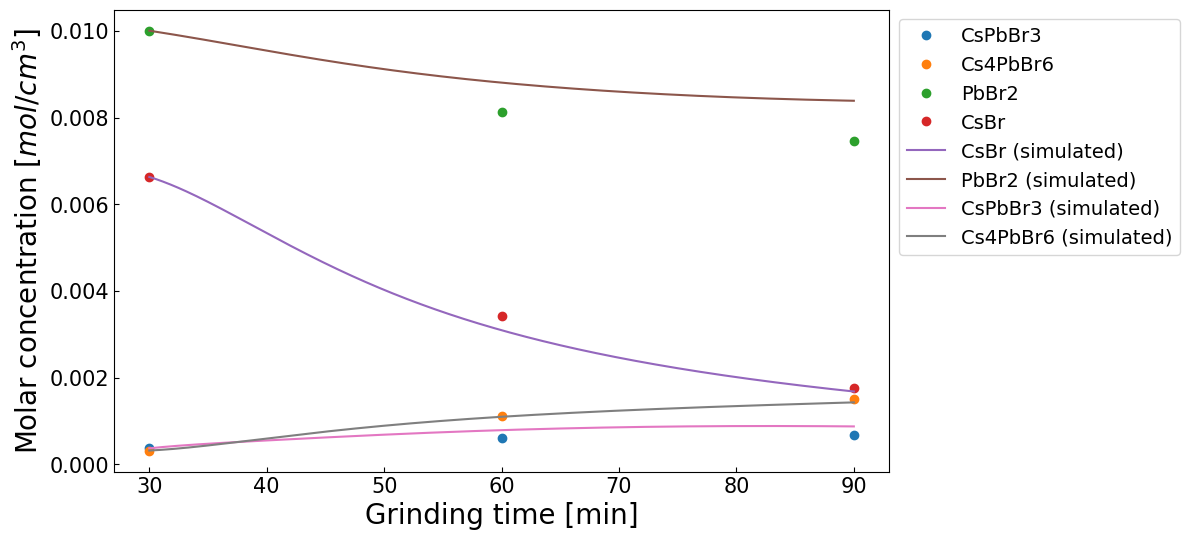

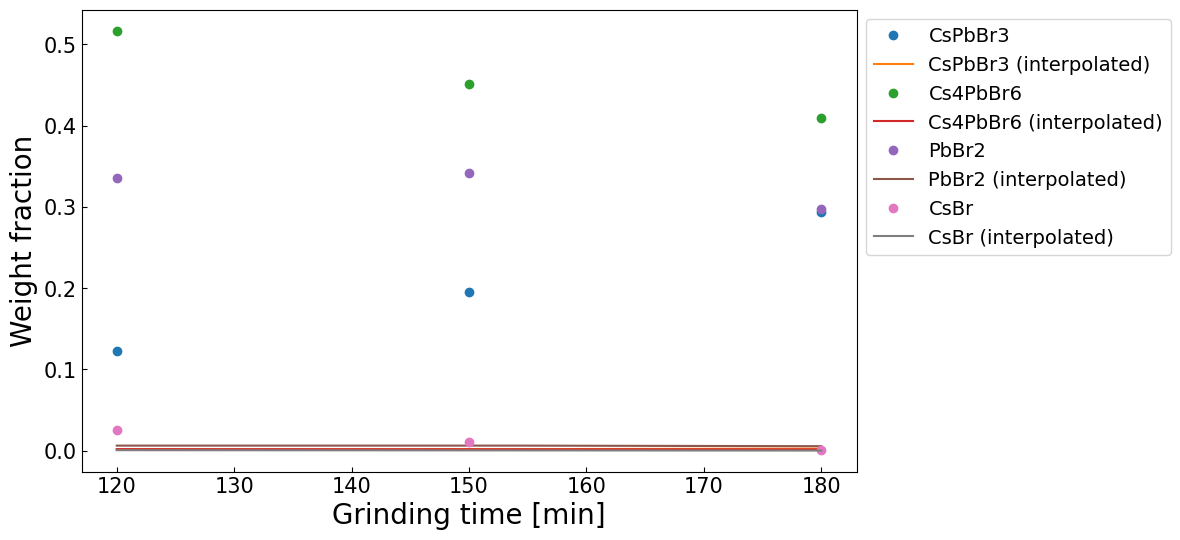

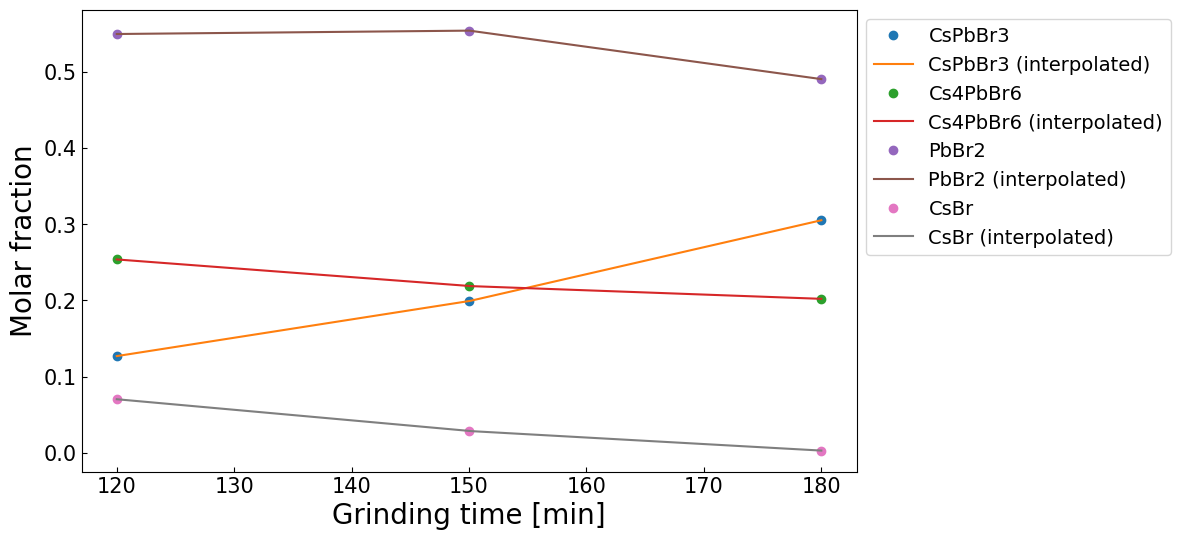

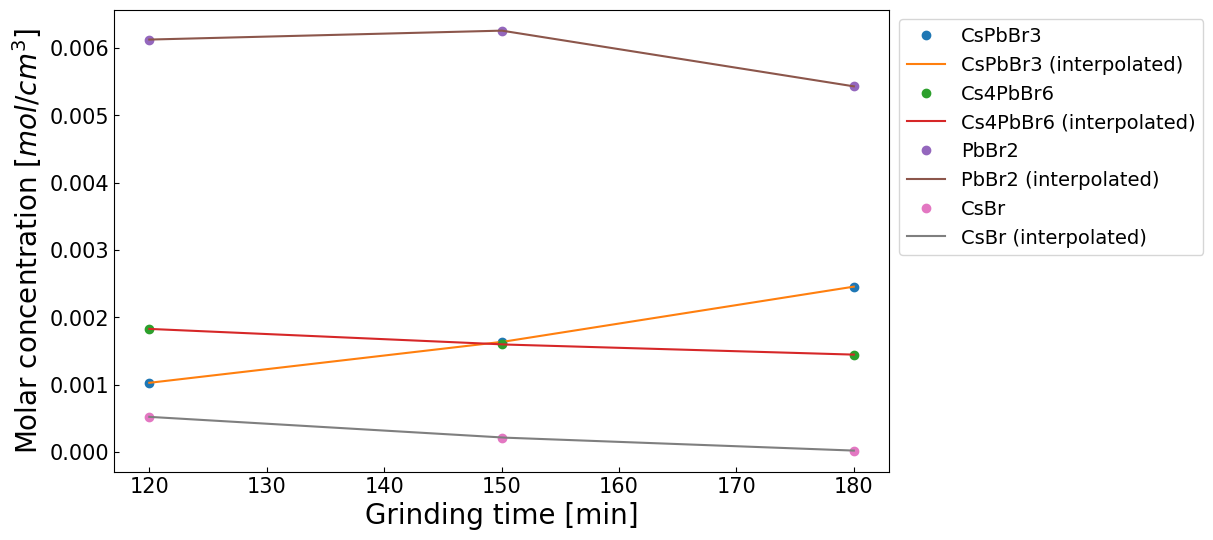

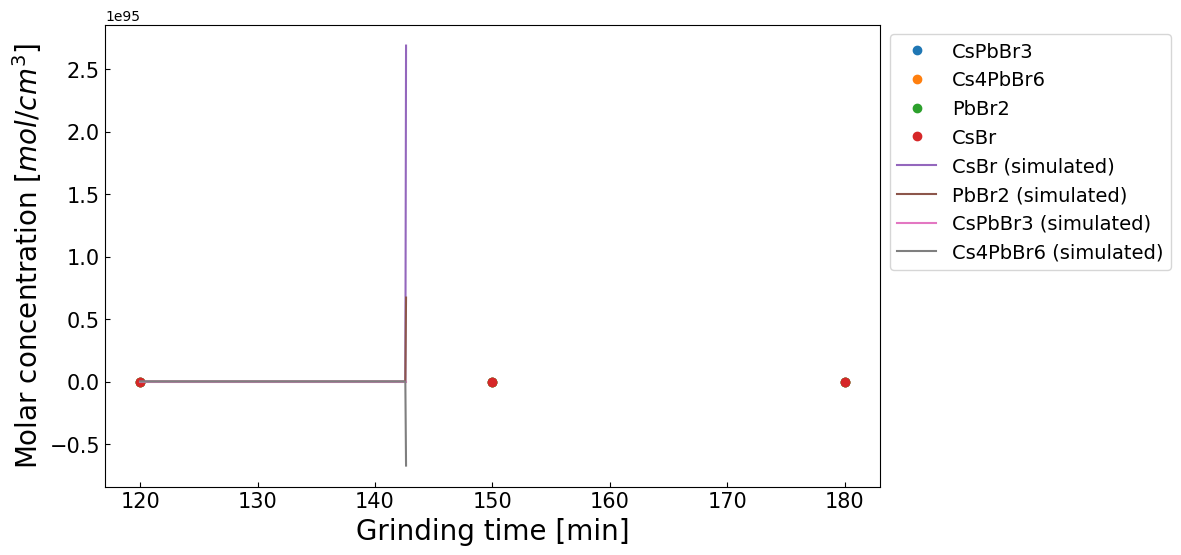

In [112]:
select_method = "linear" # "nnls","linear","lasso","ridge"
df_result = pd.DataFrame()
file_list=glob.glob("weight_fraction_target/*.csv")
for file_path in file_list:
    study_name = os.path.splitext(os.path.basename(file_path))[0]
    interp_molar_conc_log,exp_molar_conc = exp_data_preprocess(study_name=study_name,file_path=file_path, save_fig=False)
    k_list=Estimate_Constant(
    interp_molar_conc_log,
    exp_molar_conc,
    method=select_method,
    show=True,
    save_fig=study_name+"_"+select_method,
    )
    df_result[study_name]=k_list
df_result.index = ['k1', 'k2', 'k3', 'k4']
df_result.T.to_csv("constK_"+select_method+".csv",)
df_result.T